In [1]:
from analysis import *
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

In [ ]:
!pwd

In [4]:
SIM_NAME = "4k_nodes_1m"
SIM_REPS = 10

print(SIM_NAME)
for REP in range(SIM_REPS): 
    print(REP)
    nodes = []
    for filename in os.listdir(os.fsencode(f'dumps/{REP}_{SIM_NAME}')):
        filename = filename.decode("utf-8")
        with open(f'dumps/{REP}_{SIM_NAME}/{filename}', 'rb') as f:
            nodes.append(pickle.load(f))
            
    print(f'Loaded {len(nodes)} nodes.')

    blocks = get_all_blocks(nodes)
    print(f'{len(blocks)} blocks in total.')

    stale_rates = [stale_block_rate(node) for node in nodes]
    print(f'Stale block rate: {round(np.mean(stale_rates), 5)}')

    block_ints = [avg_block_interval(node) for node in nodes]
    print(f'Average block interval: {np.mean(block_ints)} iters')

    delays_50 = [block_percentile_delay(block, nodes, 0.5) for id, block in blocks.items()]
    delays_90 = [block_percentile_delay(block, nodes, 0.9) for id, block in blocks.items()]
    print(f'50% delay: {round(np.mean(delays_50), 2)} iters')
    print(f'90% delay: {round(np.mean(delays_90), 2)} iters')

    tps = transactions_per_second(blocks.values(), 100000)
    print(f'Transactions per second: {tps}')

4k_nodes_1m
0
Loaded 4475 nodes.
181 blocks in total.
Stale block rate: 0.0
Average block interval: 5414.263736263735 iters
50% delay: 22.43 iters
90% delay: 27.36 iters
Transactions per second: 3.7861104014233624
1


FileNotFoundError: [Errno 2] No such file or directory: b'dumps/1_4k_nodes_1m'

In [8]:
sum([block.tx_count for block in blocks.values()]) / len(blocks)

2102.1966397119454

In [ ]:
blocks = get_all_blocks(nodes)
print(f'{len(blocks)} blocks in total.')

In [ ]:
stale_rates = [stale_block_rate(node) for node in nodes]
print(f'Stale block rate: {round(np.mean(stale_rates), 5)}')

In [ ]:
block_ints = [avg_block_interval(node) for node in nodes]
print(f'Average block interval: {np.mean(block_ints)} iters')

In [ ]:
delays_50 = [block_percentile_delay(block, nodes, 0.5) for id, block in blocks.items()]
delays_90 = [block_percentile_delay(block, nodes, 0.9) for id, block in blocks.items()]
print(delays_50)
print(f'50% delay: {round(np.mean(delays_50[:-1]), 2)} iters')
print(f'90% delay: {round(np.mean(delays_90[:-1]), 2)} iters')

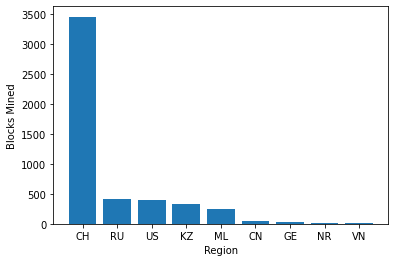

CH 69.85 %
RU 8.22 %
US 8.01 %
KZ 6.52 %
ML 5.1 %
CN 0.93 %
GE 0.57 %
NR 0.4 %
VN 0.4 %


In [3]:
mine_regions = [block.miner.region.name for id, block in blocks.items()]
REGIONS = set(mine_regions)
region_counts = dict()

for region in REGIONS:
    region_counts[region] = mine_regions.count(region)

sorted_counts = dict(sorted(region_counts.items(), key=lambda item: item[1], reverse=True))

plt.bar(sorted_counts.keys(), sorted_counts.values())
plt.xlabel('Region')
plt.ylabel('Blocks Mined')
plt.show()

for region, count in sorted_counts.items():
    print(region, round(100*count / sum(sorted_counts.values()), 2), '%')

In [ ]:
for node in nodes:
    print(node.id[-2:], [n[-2:] for n in node.ins])